## Session 26
### Assignment 1

In [ ]:
# In this assignment students need to predict whether a person makes over 50K per year
# or not from classic adult dataset using XGBoost. 

##### Extraction was done by Barry Becker from the 1994 Census database. 
##### A set of reasonably clean records was extracted using the following conditions: 
#####         ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

#### Import dataset

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)


In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
              'hours_per_week','native_country', 'wage_class']

In [4]:
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
col_labels

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'wage_class']

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
print ("Train data shape: ", train_set.shape)
print ("Test data shape:  ", test_set.shape)

Train data shape:  (32561, 15)
Test data shape:   (16281, 15)


#### XGBoost will only handle NUMERIC variables...so, need to convert all the variables

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### We need to convert the following OBJECT datatypes to Numeric:
'workclass', 'education', 'marital_status'_
'occupation', 'relationship', 'race', 'sex', 'native_country', 'wage_class'

In [10]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
train_set.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [12]:
train_set.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [13]:
train_set.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
train_set.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [15]:
train_set.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [16]:
train_set.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [17]:
train_set.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [18]:
train_set.wage_class.value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

#### Map of categorical variables to Numeric

In [19]:
map_workclass = {' Private': 1, ' Self-emp-not-inc':2, ' Local-gov':3, ' ?':4, ' State-gov':5, ' Self-emp-inc':6, ' Federal-gov':7, ' Without-pay':8, ' Never-worked':9}

map_education = {' HS-grad': 1, ' Some-college':2, ' Bachelors':3, ' Masters':4, ' Assoc-voc':5, ' 11th':6, ' Assoc-acdm':7, ' 10th':8, ' 7th-8th':9, ' Prof-school':10, ' 9th':11, ' 12th':12, ' Doctorate':13, ' 5th-6th':14,' 1st-4th':15,' Preschool':16}

map_marital = {' Married-civ-spouse': 1, ' Never-married':2, ' Divorced':3, ' Separated':4, ' Widowed':5, ' Married-spouse-absent':6, ' Married-AF-spouse':7}

map_relation = {' Husband': 1, ' Not-in-family': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5, ' Other-relative': 6 }


map_country = {' United-States': 1, ' Mexico': 2 ,' ?': 3, ' Philippines': 4, ' Germany': 5, ' Canada': 6, ' Puerto-Rico': 7, ' El-Salvador': 8, 
               ' India': 9, ' Cuba': 10, ' England': 11, ' Jamaica': 12, ' South': 13, ' China': 14, ' Italy': 15, ' Dominican-Republic': 16, 
               ' Vietnam': 17, ' Guatemala': 18, ' Japan': 19, ' Poland': 20, ' Columbia': 21, ' Taiwan': 22, ' Haiti': 23, ' Iran': 24, ' Portugal': 25, 
               ' Nicaragua': 26, ' Peru': 27, ' France': 28, ' Greece': 29, ' Ecuador': 30, ' Ireland': 31, ' Hong': 32, ' Trinadad&Tobago': 33, 
               ' Cambodia': 34, ' Laos': 35, ' Thailand': 36, ' Yugoslavia': 37, ' Outlying-US(Guam-USVI-etc)': 38, ' Honduras': 39, ' Hungary': 40 ,
               ' Scotland': 41, ' Holand-Netherlands': 42
              }

map_occupation = {' Prof-specialty': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Adm-clerical': 4, ' Sales': 5,
                  ' Other-service': 6, ' Machine-op-inspct': 7, ' ?': 8, ' Transport-moving': 9, ' Handlers-cleaners': 10 ,
                  ' Farming-fishing': 11, ' Tech-support': 12, ' Protective-serv': 13, ' Priv-house-serv': 14, ' Armed-Forces': 15
                 }

map_race = {' White': 1, ' Black': 2, ' Asian-Pac-Islander': 3, ' Amer-Indian-Eskimo': 4, ' Other': 5 }

map_sex = {' Male': 1, ' Female': 2 }

map_wage = {' <=50K': 0, ' >50K': 1}

map_wage_test = {' <=50K.': 0, ' >50K.': 1}  # Note that there is an additional 'dot' in the test dataset, so need a separate mapping


#### Assign the same mapping to both the TRAIN and TEST datasets

In [20]:
train_set.replace({'workclass':map_workclass, 'education':map_education, 'marital_status':map_marital ,'relationship':map_relation , 
                  'native_country':map_country, 'race':map_race, 'sex':map_sex, 'occupation':map_occupation, 'wage_class':map_wage} , 
                  inplace = True)

test_set.replace({'workclass':map_workclass, 'education':map_education, 'marital_status':map_marital ,'relationship':map_relation , 
                  'native_country':map_country, 'race':map_race, 'sex':map_sex, 'occupation':map_occupation, 'wage_class':map_wage_test} , 
                  inplace = True)

#### Validate that both TRAIN and TEST datasets are fully NUMERIC

In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education         32561 non-null int64
education_num     32561 non-null int64
marital_status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null int64
wage_class        32561 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [22]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null int64
fnlwgt            16281 non-null int64
education         16281 non-null int64
education_num     16281 non-null int64
marital_status    16281 non-null int64
occupation        16281 non-null int64
relationship      16281 non-null int64
race              16281 non-null int64
sex               16281 non-null int64
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null int64
wage_class        16281 non-null int64
dtypes: int64(15)
memory usage: 1.9 MB


#### Now, export the TRAIN and TEST datasets to csv files

In [23]:
train_set.to_csv('adult_train.csv')
test_set.to_csv('adult_test.csv')

#### Modeling using XGBoost

In [24]:
import numpy as np
import xgboost as xgb

#### Load the 2 CSV files into DMatrix


In [25]:
dtrain = xgb.DMatrix('adult_train.csv?format=csv&label_column=15') # Note that the wage_class is the 16th column, so index of 15
dtest = xgb.DMatrix('adult_test.csv?format=csv&label_column=15')

In [26]:
print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()+1))
print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()+1))

Train dataset contains 32562 rows and 16 columns
Test dataset contains 16282 rows and 16 columns


In [27]:
dtrain.feature_names

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14']

In [28]:
dtrain.get_label()

array([ 0.,  0.,  0., ...,  0.,  0.,  1.], dtype=float32)

In [29]:
dtest.get_label()

array([ 0.,  0.,  0., ...,  0.,  0.,  1.], dtype=float32)

In [30]:
print("Train possible labels: ")
print(np.unique(dtrain.get_label()))

print("\nTest possible labels: ")
print(np.unique(dtest.get_label()))

Train possible labels: 
[ 0.  1.]

Test possible labels: 
[ 0.  1.]


In [31]:
params = {
    'objective':'binary:logistic',
    'max_depth':3,
    'silent':0,
    'eta':1
}

num_rounds = 10

In [32]:
bst = xgb.train(params, dtrain, num_rounds)

In [33]:
watchlist  = [(dtest,'test'), (dtrain,'train')] # native interface only
bst = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-error:0.155202	train-error:0.156102
[1]	test-error:0.147525	train-error:0.148916
[2]	test-error:0.147341	train-error:0.148977
[3]	test-error:0.146112	train-error:0.144186
[4]	test-error:0.142059	train-error:0.141269
[5]	test-error:0.140585	train-error:0.139733
[6]	test-error:0.136101	train-error:0.13611
[7]	test-error:0.137268	train-error:0.13571
[8]	test-error:0.134934	train-error:0.134206
[9]	test-error:0.135426	train-error:0.132977


In [34]:
preds_prob = bst.predict(dtest)
preds_prob

array([ 0.00720593,  0.0157756 ,  0.21517402, ...,  0.84883511,
        0.12000929,  0.75584322], dtype=float32)

In [42]:
labels = dtest.get_label()
preds = preds_prob > 0.5 # threshold
correct = 0

for i in range(len(preds)):
    if (labels[i] == preds[i]):
        correct += 1

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-correct/len(preds)))

Predicted correctly: 14077/16282
Error: 0.1354


In [43]:
# custom evaluation metric - 'misclassified'
def misclassified(pred_probs, dtrain):
    labels = dtrain.get_label() # obtain true labels
    preds = pred_probs > 0.5 # obtain predicted values
    return 'misclassified', np.sum(labels != preds)

In [44]:
bst = xgb.train(params, dtrain, num_rounds, watchlist, feval=misclassified, maximize=False)

[0]	test-error:0.155202	train-error:0.156102	test-misclassified:2527	train-misclassified:5083
[1]	test-error:0.147525	train-error:0.148916	test-misclassified:2402	train-misclassified:4849
[2]	test-error:0.147341	train-error:0.148977	test-misclassified:2399	train-misclassified:4851
[3]	test-error:0.146112	train-error:0.144186	test-misclassified:2379	train-misclassified:4695
[4]	test-error:0.142059	train-error:0.141269	test-misclassified:2313	train-misclassified:4600
[5]	test-error:0.140585	train-error:0.139733	test-misclassified:2289	train-misclassified:4550
[6]	test-error:0.136101	train-error:0.13611	test-misclassified:2216	train-misclassified:4432
[7]	test-error:0.137268	train-error:0.13571	test-misclassified:2235	train-misclassified:4419
[8]	test-error:0.134934	train-error:0.134206	test-misclassified:2197	train-misclassified:4370
[9]	test-error:0.135426	train-error:0.132977	test-misclassified:2205	train-misclassified:4330


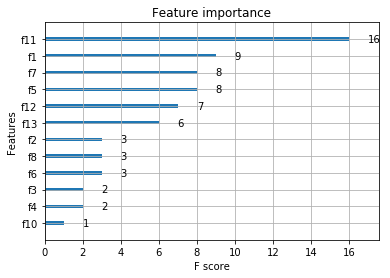

In [45]:
xgb.plot_importance(bst)

#### Translate the feature names from below

In [46]:
for i in range (15):
    col = train_set.columns[i]
    print ("f",i, "=", col)

f 0 = age
f 1 = workclass
f 2 = fnlwgt
f 3 = education
f 4 = education_num
f 5 = marital_status
f 6 = occupation
f 7 = relationship
f 8 = race
f 9 = sex
f 10 = capital_gain
f 11 = capital_loss
f 12 = hours_per_week
f 13 = native_country
f 14 = wage_class


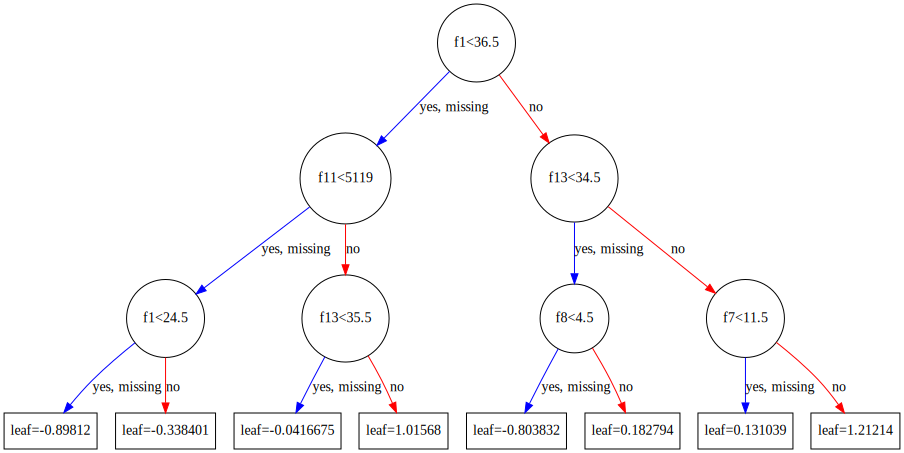

In [47]:
xgb.to_graphviz(bst, num_trees=3)

#### XGBoost is able to predice the wage class at 13.5% error i.e. 86.5% accuracy